# <center><u>Introduction to Neural Network and Deep Learning</u></center>

***
***
# <u>PART A</u>
***

## <u>Solution 1A</u>

### Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import random
import re, os
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns  # For better visualization
import tensorflow as tf
import keras_tuner as kt
import h5py
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization, Activation
from keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import backend as backend
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
backend.clear_session()

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

### **Loading the Dataset**

In [3]:
# Reading the data from CSV into DataFrame

signal = pd.read_csv("C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Module 8 - Intro to Neural Networks (Week 28 to Week 31)/Project/Signals.csv")

In [4]:
# Preview of the data

signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Taking a look at the Columns and their Datatypes**

In [5]:
# Printing shape and columns of DataFrame 'Signal'

print("\nSignals DataFrame:\n")
print("     There are", signal.shape[0], "rows and", signal.shape[1], "columns in the dataframe\n")
print("     Columns:", signal.columns.tolist())


Signals DataFrame:

     There are 1599 rows and 12 columns in the dataframe

     Columns: ['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8', 'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength']


In [6]:
# Printing Data Types

print("\nData Types of 'Signals' DataFrame:\n")
print(signal.dtypes)


Data Types of 'Signals' DataFrame:

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object


> All, except the target variable ('Signal_Strength'), which is of 'int' ype, are of 'float' type

### **5-Point Summary**

In [7]:
# Five Points summary of our dataset
signal.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


*  Parameter 1 has a mean of 8.31, higher than its median of 7.90, suggesting a positive skewness due to a few high outliers. Conversely, Parameter 2 is balanced, with both mean and median around 0.53
* Parameter 7 displays high variability, indicated by a standard deviation of 33.41, meaning its values fluctuate a bit. In contrast, Parameter 5 is consistent, with a low standard deviation of just 0.05
* Parameters 6 and 7 contain significant outliers, with maximum values that exceed the 75th percentile
* Most parameters show a positive skewness

## <u>Solution 1B</u>

In [8]:
# Checking missing values for each attribute

print("Percentage of missing values for each attribute present in the dataframe:\n")
for column in signal.columns:
    missing_values = signal[column].isnull().sum() / len([column]) * 100
    print(f"{column} - {missing_values}%")

Percentage of missing values for each attribute present in the dataframe:

Parameter 1 - 0.0%
Parameter 2 - 0.0%
Parameter 3 - 0.0%
Parameter 4 - 0.0%
Parameter 5 - 0.0%
Parameter 6 - 0.0%
Parameter 7 - 0.0%
Parameter 8 - 0.0%
Parameter 9 - 0.0%
Parameter 10 - 0.0%
Parameter 11 - 0.0%
Signal_Strength - 0.0%


> Above data shows that we don't have any missing values in our "Signals" dataframe.

## <u>Solution 1C</u>

### **Fetching the Duplicate Rows**

In [9]:
# Checking for duplicate records in our dataset

duplicate_rows = signal.duplicated().sum()
print(f"Number of duplicate records: {duplicate_rows}")

Number of duplicate records: 240


In [10]:
# Displaying the duplicate rows
print("Duplicate rows in the dataset:")
signal[signal.duplicated()].sort_values(by = ['Parameter 2', 'Parameter 3'], ascending = True).head(10)

Duplicate rows in the dataset:


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
949,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
950,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
1018,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
271,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6
277,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6
244,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
535,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
1412,8.2,0.24,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9,6
430,10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0,7
1425,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6


> Now, as we see, we have around 240 duplicate rows in our "Signals' dataset. Imputing them with mean or mode wouldn't be a good choice as it might hamper the actual imformation in our dataset. It is best if we remove the duplicate rows, specially when we see the entire row being duplicated, and keep only 1 such record.

> We shall now proceed to remove duplicate rows

### **Dropping Duplicate Rows (Instead of Imputing)**

In [11]:
# Dropping duplicate rows
signal = signal.drop_duplicates(keep = 'first')

In [12]:
# Checking again for duplicate records in our dataset

duplicate_rows = signal.duplicated().sum()
print(f"Number of duplicate records: {duplicate_rows}")

Number of duplicate records: 0


> We have successfully removed duplicate rows from out dataframe and kept only the first occurrence of such rows.
> Let's proceed with next steps now

In [13]:
print("There are", signal.shape[0], "rows and", signal.shape[1], "columns in the dataframe after removing duplicate rows")

There are 1359 rows and 12 columns in the dataframe after removing duplicate rows


## <u>Solution 1D</u>

> To visualize the distributions of our target variable, we'll be creating different plots and sharing insights based on the same. We'll start with plotting plot the **Barplot distribution of target variable** followed by the **Histogram-Boxplot combination for each of the attributes** in our dataset

### **Getting Unique Values Count for Signal_Strength (Target Variable)**

In [14]:
signal['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

### **Visual Distribution of Target Variable**

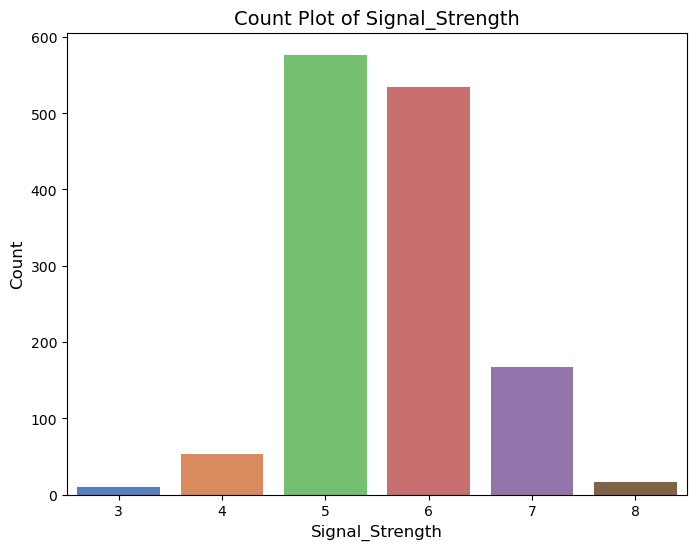

In [15]:
# Creating a count plot for the target variable 'Signal_Strength'
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Signal_Strength', data = signal, palette = 'muted')

# Adding title and labels for clarity
plt.title('Count Plot of Signal_Strength', fontsize = 14)
plt.xlabel('Signal_Strength', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# Show the plot
plt.show()

The visualisation of our target variable, 'Signal_Stregth' shows below factors - 

 1. **Dominance of Signal Strength 5 and 6:**
    * The majority of the observations are concentrated around signal strengths of 5 and 6. These two categories make up a significant portion of the dataset
    * Signal strength 5 has the highest count, followed closely by signal strength 6
    <br><br>
 2. **Fewer Observations in Extremes:**
    * Signal strengths 3, 4, 7, and 8 have fewer observations. This indicates that lower and higher signal strengths are less common
    * Particularly, signal strengths 3 and 8 are rare, which might make it challenging for models to learn from them
    <br><br>
 3. **Middle Signal Strengths:**
    * The signal strengths between 5 and 6 represent a typical or average range
    * These signal strengths could represent more stable or common conditions, whereas the lower and higher ends might correspond to more extreme situations
    <br><br>
 4. **Potential for Class Imbalance:**
    * Since the distribution is skewed towards certain values, such as 5 and 6, this indicates a potential class imbalance issues
    * We might require to explore techniques like oversampling, undersampling, or weighted classes to ensure balanced learning

### **Histogram - Boxplot Distribution**

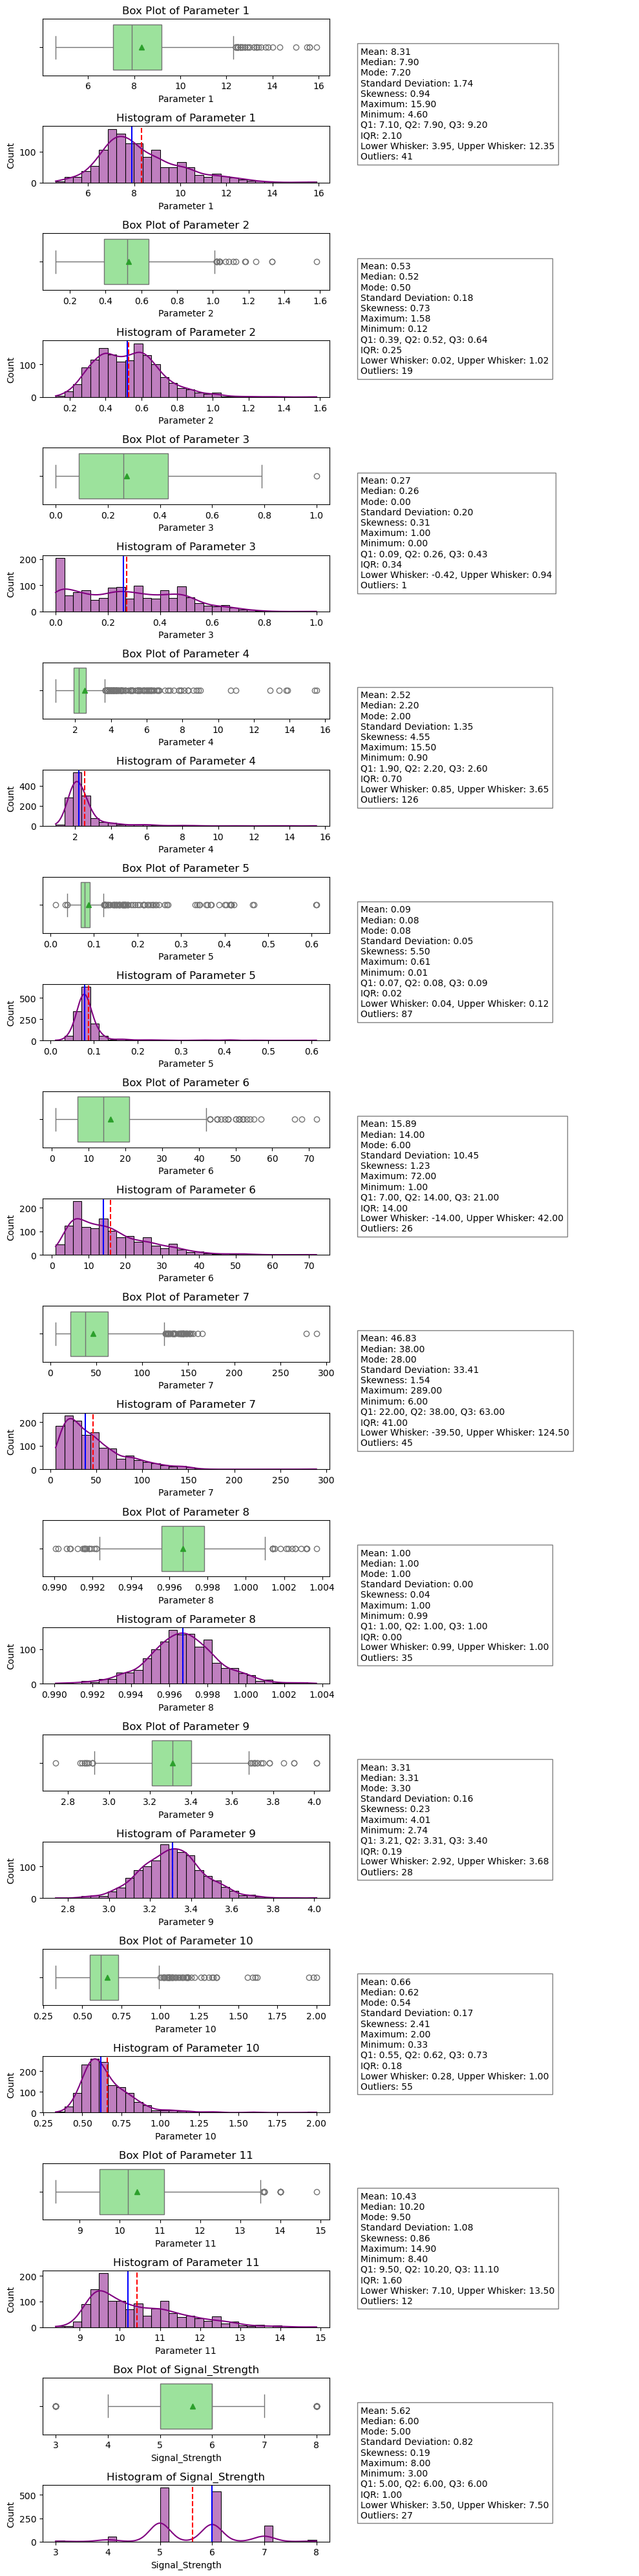

In [16]:
# Number of columns to plot
num_columns = len(signal.columns)

# Creating a figure with subplots
fig, axes = plt.subplots(num_columns * 2, 2, figsize = (10, 40))

# To flatten the axes array for easier indexing
axes = axes.reshape(num_columns * 2, 2)

for i in range(num_columns):
    column_name = signal.columns[i]
    
    # Indices for plotting
    boxplot_idx = i * 2             # Index for Box Plot
    histplot_idx = boxplot_idx + 1  # Index for Histogram
    stat_idx = i * 2                # Index for statistics
    
    # Box Plot
    sns.boxplot(data = signal, x = column_name, ax = axes[boxplot_idx, 0], color = 'lightgreen', showmeans = True)
    axes[boxplot_idx, 0].set_title(f'Box Plot of {column_name}')
    
    # Histogram
    sns.histplot(signal[column_name], bins = 30, kde = True, ax = axes[histplot_idx, 0], color = 'purple')
    axes[histplot_idx, 0].set_title(f'Histogram of {column_name}')
    
    axes[histplot_idx, 0].axvline(signal[column_name].mean(), color = "red", linestyle = "--")  # Add mean to the histogram
    axes[histplot_idx, 0].axvline(signal[column_name].median(), color = "blue", linestyle = "-")  # Add median to the histogram
    
    # To calculate outliers using IQR
    Q1 = signal[column_name].quantile(0.25)
    Q2 = signal[column_name].quantile(0.50)
    Q3 = signal[column_name].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 * IQR)
    U_W = (Q3 + 1.5 * IQR)
    
    # To calculate outlier count
    outliers = ((signal[column_name] < L_W) | (signal[column_name] > U_W)).sum()
    
    # To display statistics
    stats_text = (
        f'Mean: {signal[column_name].mean():.2f}\n'
        f'Median: {signal[column_name].median():.2f}\n'
        f'Mode: {signal[column_name].mode()[0]:.2f}\n'
        f'Standard Deviation: {signal[column_name].std():.2f}\n'
        f'Skewness: {signal[column_name].skew():.2f}\n'
        f'Maximum: {signal[column_name].max():.2f}\n'
        f'Minimum: {signal[column_name].min():.2f}\n'
        f'Q1: {Q1:.2f}, Q2: {Q2:.2f}, Q3: {Q3:.2f}\n'
        f'IQR: {IQR:.2f}\n'
        f'Lower Whisker: {L_W:.2f}, Upper Whisker: {U_W:.2f}\n'
        f'Outliers: {outliers}'
    )
    
    # To add the statistics text next to both the boxplot and histogram
    axes[boxplot_idx, 1].text(0.05, 0.5, stats_text, transform = axes[boxplot_idx, 1].transAxes, fontsize = 10,
                               verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.5))
    axes[boxplot_idx, 1].axis('off')  # Hide the axis for the stat text box
    
    # The histogram row does not need anything in the stats column
    axes[histplot_idx, 1].axis('off')  # Turn off the second axis in the histogram row

plt.tight_layout()
plt.subplots_adjust(hspace = 0.9)  # To add space between the subplots
plt.show()

With above Boxplot and Histogram distribution, we can see below points:

 * Most parameters exhibit right skewness, indicating that while the majority of values are concentrated at lower levels, a few extreme readings significantly affect the overall averages
 * Some parameters show noticable outliers, suggesting there are some extreme values which show anomalies in the data however, those can also be actual situations affecting signal quality
 * The mean values across parameters reflect varying signal strengths, with some indicating consistent performance while others reveal significant variability and can have improvements
 * There are certain parameters with higher skewness which suggest we have challenges with consistent performance across and there is a need of constant monitoring of signal strength

## <u>Solution 1E</u>

### **Correlation Heatmap w.r.t Target Variable**

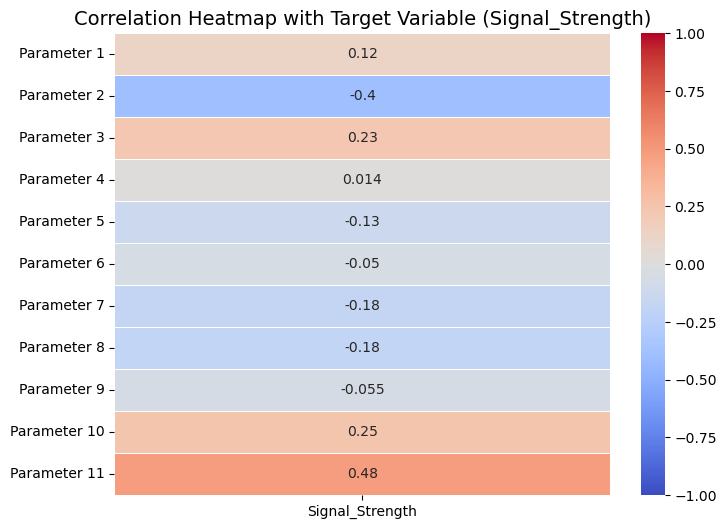

In [17]:
# Computing the correlation matrix for the dataset
correlation_matrix = signal.corr()

# Extracting only the correlations with respect to 'Signal_Strength'
target_correlation = correlation_matrix.drop('Signal_Strength', axis = 0)[['Signal_Strength']]

# Plotting the heatmap for the correlation with 'Signal_Strength'
plt.figure(figsize = (8, 6))
sns.heatmap(target_correlation, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, linewidths = 0.5, linecolor = 'white')

# Adding title for clarity
plt.title('Correlation Heatmap with Target Variable (Signal_Strength)', fontsize = 14)

# Showing the heatmap
plt.show()

 * Parameter 11 has the strongest positive correlation (0.48) with Signal_Strength, indicating it's a key factor in increasing signal strength

 * Parameter 2 shows a significant negative correlation (-0.40) w.r.t Signal_Strength, implying it reduces signal strength as its value increases

 * Parameter 10 has a moderate positive correlation (0.25), suggesting it plays a secondary role in improving signal strength

 * Parameter 3 moderately increases signal strength with a correlation of 0.23, potentially impacting signal performance

 * Parameters 6, 9, and 4 exhibit near-zero correlations, suggesting minimal influence on signal strength

### **Overall Insight from above Initial Data Analysis**

 * Parameters 2 and 11 show the highest correlations with Signal Strength, with Parameter 2 being negatively correlated (-0.4) and Parameter 11 showing a strong positive correlation (0.48). This indicates that changes in these parameters may heavily influence the Signal Strength, with Parameter 11 boosting it and Parameter 2 reducing it

 *  The majority of data points in the target variable "Signal Strength" are clustered around values 5 and 6, with fewer samples at the extremes (3 and 8), indicating moderate variability. The low frequencies at 3, 4, and 8 indicate fewer extreme values, suggesting our dataset primarily consists of moderate signal strength, with little presence of weak or very strong signals

 * Many features exhibit significant skewness and outliers. Parameters like 4, 5, and 7 are skewed right with substantial outliers, indicating data spread is uneven for these attribute

 * Parameters vary in distribution, with some showing wide ranges (e.g., Parameter 7) while others like Parameter 9 and 8 are tightly clustered, suggesting minimal variability. This indicates that we would need to consider feature scaling to improve model performance and ensure all features contribute equally, specially with the target variable being highly unscaled


**These distribution insights can also help shape market strategies by showing which metrics are reliable and where performance needs a boost to improve signal quality overall**

***
## <u>Solution 2A</u>

In [18]:
# Splitting data into X and Y

# X will have all columns except 'Signal_Strength'
X = signal.drop(columns = ['Signal_Strength'])

# Y will be the target variable 'Signal_Strength'
y = signal['Signal_Strength']

In [19]:
# Printing the shape of X
print("Shape of X:", X.shape)
X.head()

Shape of X: (1359, 11)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [20]:
# Printing the shape of y
print("Shape of y:", y.shape[0])
y.head()

Shape of y: 1359


0    5
1    5
2    5
3    6
5    5
Name: Signal_Strength, dtype: int64

## <u>Solution 2B</u>

In [21]:
# Splitting the data into train and test sets: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## <u>Solution 2C</u>

In [22]:
# Printing the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape[0])
print("Shape of Y_test:", y_test.shape[0])

# Verifying if the number of samples match, i.e., if train and test data is in sync
if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("\nTrain and test data are in sync!")
else:
    print("\nThere is a mismatch between train and test data!")

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: 951
Shape of Y_test: 408

Train and test data are in sync!


##  <u>Solution 2D</u>

Here we'll be normalizing the data in our dataset with help of Min-Max Scaler. We can also use Standard Scaler here howevre, using min-Max Scaler is a bbetter choice for our dataset because:
 * We are designing a Neural Network to train our classifier and would use activation functions like sigmoid or tanh, which work best when inputs are in the range of [0, 1] or [-1, 1]. Min-Max Scaler scales the data within this range, making it more compatible with these activations
 * Our data also contains notable outliers and as we have seen previously in BoxPlot-Histogram Distribution, most of our attributes are skewed and not normally distributed. In this case, the scaling done by StandardScaler may still leave values outside of the [-1, 1] or [0, 1] range, which could affect how well the activation functions work. With Min-Max Scaler, however, input values are scaled uniformly, helping the data to process smoothly
 * Also, unlike Standard Scaler, MinMaxScaler ensures that all features contribute equally by scaling each to the same range (like [0, 1]). This will prevent our model from being biased toward features with larger ranges
 
 So, MinMaxScaler is more effective, especially with features that have different ranges, like in our dataset so, MinMaxScaler is better for our case

In [23]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler on the training data and transforming both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Printing shapes and few records to confirm
print("X_train_scaled shape:", X_train_scaled.shape)

# Converting to dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled_df.head()

X_train_scaled shape: (951, 11)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,0.831858,0.176056,0.807692,0.223077,0.128548,0.057143,0.144876,0.862909,0.144231,0.290909,0.369231
1,0.407080,0.211268,0.294872,0.130769,0.131886,0.228571,0.250883,0.696877,0.278846,0.109091,0.153846
2,0.699115,0.211268,0.807692,0.084615,0.098497,0.057143,0.031802,0.664890,0.125000,0.327273,0.276923
3,0.274336,0.049296,0.474359,0.069231,0.056761,0.300000,0.190813,0.535415,0.528846,0.230303,0.569231
4,0.212389,0.323944,0.102564,0.069231,0.106845,0.085714,0.063604,0.588728,0.596154,0.121212,0.092308


In [25]:
print("X_test_scaled shape:", X_test_scaled.shape)

# Converting to dataframe
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled_df.head()

X_test_scaled shape: (408, 11)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,0.274336,0.323944,0.051282,0.223077,0.120200,0.328571,0.137809,0.588728,0.461538,0.121212,0.169231
1,0.318584,0.334507,0.128205,0.092308,0.101836,0.328571,0.190813,0.480579,0.413462,0.254545,0.384615
2,0.336283,0.147887,0.551282,0.107692,0.085142,0.142857,0.045936,0.413557,0.298077,0.290909,0.430769
3,0.469027,0.232394,0.743590,0.200000,0.136895,0.100000,0.130742,0.786748,0.413462,0.151515,0.092308
4,0.150442,0.605634,0.000000,0.084615,0.118531,0.214286,0.063604,0.327494,0.701923,0.133333,0.430769


##  <u>Solution 2E</u>

> To transform the labels into format acceptable by Neural Network, we'll be using TensorFlow's **"to_categorical"** function. This will ensure that the shape of y_train and y_test is compatible with our neural network architecture. The **"to_categorical"** function will transform the y_train and y_test labels into a one-hot encoded matrix and each  row will represent the label as a vector, where a 1 will appear at the index corresponding to the label and it will be a 0 elsewhere

In [26]:
# Transforming labels into one-hot encoding format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Verifying the shapes of one-hot encoded labels
print("Shape of y_train_encoded:", y_train_encoded.shape)
y_train_encoded_df = pd.DataFrame(y_train_encoded)
y_train_encoded_df.head()

Shape of y_train_encoded: (951, 9)


,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


> Now, as we see, we had 6 unique values, [3, 4, 5, 6, 7, 8], for our target variable, however, instead of making 6 different columns, the to_categorical function created 9 different columns, then encoding method created an output dimension based on the maximum label, 8, thus producing 9 categories (from 0 to 8), causing 3 unused caregories, [0, 1, 2]

> To solve this, we can do a trick to first adjust our target variable label values from [3, 4, 5, 6, 7, 8] to [0, 1, 2, 3, 4, 5]. We can acheive this by simply subscracting the minimum label value (3) from our 'Signal_Strength' target variable values and then apply **"to_categorical"** to encode the values further. This way it will only return 6 categories instead of earlier 9

In [27]:
# Adjusting labels to start from 0
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_test.min()

# Applying the to_categorical function to transform labels into one-hot encoding format
y_train_encoded = to_categorical(y_train_adjusted)
y_test_encoded = to_categorical(y_test_adjusted)

In [28]:
# Verifying the shapes of one-hot encoded labels now

print("Shape of y_train_encoded:", y_train_encoded.shape)
y_train_encoded_df = pd.DataFrame(y_train_encoded)
y_train_encoded_df.head()

Shape of y_train_encoded: (951, 6)


,0,1,2,3,4,5
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
print("Shape of y_test_encoded:", y_test_encoded.shape)
y_test_encoded_df = pd.DataFrame(y_test_encoded)
y_test_encoded_df.head()

Shape of y_test_encoded: (408, 6)


,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


> The point to be noted here is that the previous result with 9 columns isn't incorrect or it won't affect the overall accuracy of our model, but it's inefficient and unnecessary because there are 3 extra columns added which can unnecessarily make our future computation on the model more complex. The current result now, is expected to eliminate those inefficiencies and potentially lead to faster training of our Neural Network model

***
##  <u>Solution 3A</u>

In [30]:
# Resetting the session
backend.clear_session()
np.random.seed(100)
random.seed(100)
tf.random.set_seed(100)

> We'll now proceed with designing a Neural Network to train a classifier on our dataset. <br> This will include:
> * The initializer, Sequential
> * The number of layers (input, hidden, output)
> * The number of units in each layer
> * The types of activation functions
> * Regularization techniques like dropout, etc

### **Initializing the Sequential model**

In [31]:
model = Sequential()
print(model)

<Sequential name=sequential, built=False>


### **Adding Input Layers**

In [32]:
# Number of input features (input_dim) = X_train.shape[1]
model.add(Dense(32, input_dim = X_train_scaled.shape[1], activation = 'relu')) 
print(model)

<Sequential name=sequential, built=True>


### **Defining the Hidden layers**

In [33]:
# Hidden Layer 1
model.add(Dense(24, activation = 'relu')) # Using ReLu as Activation Function
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting

# Hidden Layer 2
model.add(Dense(16, activation = 'relu')) # Using ReLu as Activation Function
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting

print(model)

<Sequential name=sequential, built=True>


### **Output Layer**

In [34]:
# Output Layer: 6 classes, hence units = 6 with softmax activation
model.add(Dense(6, activation = 'softmax'))
print(model)

<Sequential name=sequential, built=True>


### **Printing the architecture**

 We'll print the model summary here.
  * It shows how our neural network is constructed layer by layer, with the key features of each layer:
  * The model type is sequential, meaning layers are added one after another in a simple stack, without any branching or looping
  * It also gives the name and type of layer, the shape of the data as it leaves the layer, and the number of trainable parameters in that layer

In [35]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,678 (6.55 KB)

 Trainable params: 1,678 (6.55 KB)

 Non-trainable params: 0 (0.00 B)

> We have finished designing our Neural Network!
> Our Neural Network has below:
> * **Input Layer:** The number of units are matching with the number of features (columns) in our dataset
> * **Hidden Layer:** We've added 2 hidden layers with ReLU activation. This will help to to introduce non-linearity
> * **Output layer:** Since this is a multi-class classification problem with 6 classes, we have used softmax activation

> Since our taregt variable has more than 2 classes, we have used **Softmax Activation Function** in the output layer of our neural network instead of Sigmoid, which is generally used for a binary class scenario. This will ensure that only one class is predicted with the highest probability while the others receive lower probabilities. <br><br> We have also used **ReLU (Rectified Linear Unit)** as the Activation Function for the hidden layers to introduce non-linearity

##  <u>Solution 3B</u>

### **Compile the model**

 * We will specify an optimizer, loss function and a metrics
 * Optimizer being used is Adam optimizer for better convergence
 * We'll be using categorical_crossentropy as loss function since we have multi-class classification

In [36]:
# Compiling the model to define how the model will learn and evaluate
model.compile(optimizer = SGD(learning_rate = 0.001),   # so we have adaptive learning rates
              loss = 'categorical_crossentropy',         # for multi-class classification
              metrics = ['accuracy'])
print(model)

<Sequential name=sequential, built=True>


### **Training the Model**

 * We'll be using 10 epochs and a batch size of 16 to train our model
 * This will be validated using the test data (X_test_scaled and y_test_encoded)

In [37]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded, 
                    validation_data = (X_test_scaled, y_test_encoded),
                    epochs = 10, batch_size = 16)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1741 - loss: 1.8299 - val_accuracy: 0.2230 - val_loss: 1.7924
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2169 - loss: 1.8052 - val_accuracy: 0.3505 - val_loss: 1.7699
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2627 - loss: 1.7933 - val_accuracy: 0.4118 - val_loss: 1.7512
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3275 - loss: 1.7656 - val_accuracy: 0.4093 - val_loss: 1.7352
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3488 - loss: 1.7580 - val_accuracy: 0.4093 - val_loss: 1.7210
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3553 - loss: 1.7400 - val_accuracy: 0.3946 - val_loss: 1.7078
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3846 - loss: 1.7243 - val_accuracy: 0.3676 - val_loss: 1.6949
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3923 - loss: 1.7047 - val_accuracy: 0.3873 - val_loss

In [38]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_encoded, verbose = 1)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose = 1)
output_data = {
    "Metrics": ["Accuracy", "Loss"],
    "Train Set": [format(train_accuracy, '.3f'), format(train_loss, '.3f')],
    "Test Set": [format(test_accuracy, '.3f'), format(test_loss, '.3f')]
}
pd.DataFrame(output_data).head()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4244 - loss: 1.6590 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4155 - loss: 1.6518 


,Metrics,Train Set,Test Set
0,Accuracy,0.407,0.417
1,Loss,1.661,1.660


> To quickly summarize the above:
>  * The training accuracy improved initially but showed fluctuations in later epochs. The validation accuracy also fluctuated too much near then end, which indicates that our model experienced some overfitting
>  * We can try adjusting the learning rate to improve accuracy and loss

##  <u>Solution 3C</u>

> Before starting with the plot visuals, let's create methods to remove code redundancy.

In [39]:
def plot_loss(history):
    """
    Plots the training and validation loss over epochs
    
    Parameters:
    history: History object from model.fit()
    """
    # Extracting loss values from the history object 
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Plotting the training loss vs validation loss
    # plt.figure(figsize = (8, 6))
    plt.plot(training_loss, label = 'Training Loss')
    plt.plot(validation_loss, label = 'Validation Loss')

    # Adding labels and title
    plt.title('Training and Validation Loss Over Epochs', fontsize = 14)
    plt.xlabel('Epochs', fontsize = 12)
    plt.ylabel('Loss', fontsize = 12)

    # Adding a legend to distinguish the two lines
    plt.legend()

    # Displaying the plot
    plt.show()

In [40]:
def plot_accuracy(history):
    """
    Plots the training and validation accuracy over epochs
    
    Parameters:
    history: History object from model.fit()
    """
    # Extracting accuracy values from the history object
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    # Plotting the training accuracy vs validation accuracy
    # plt.figure(figsize = (8, 6))
    plt.plot(training_accuracy, label = 'Training Accuracy')
    plt.plot(validation_accuracy, label = 'Validation Accuracy')

    # Adding labels and title
    plt.title('Training and Validation Accuracy Over Epochs', fontsize = 14)
    plt.xlabel('Epochs', fontsize = 12)
    plt.ylabel('Accuracy', fontsize = 12)

    # Adding a legend to distinguish the two lines
    plt.legend()

    # Displaying the plot
    plt.show()

### **Plot Training Loss and Validation Loss**

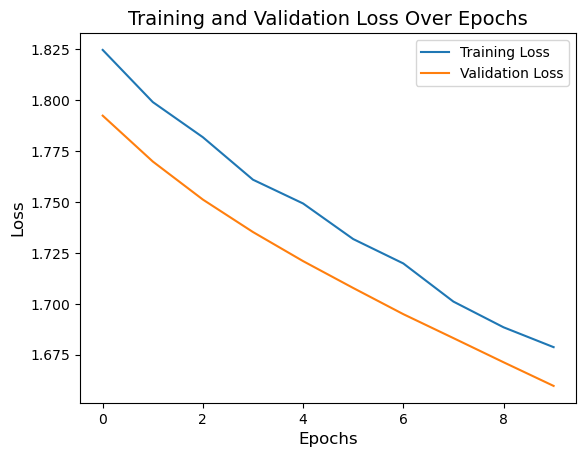

In [41]:
plot_loss(history)

 * The training loss starts high and decreases steadily as the number of epochs increases
 * Our model continues to reduce loss, but the downward slope becomes more gradual over time, suggesting that it might not have fully converged
 * The validation loss starts lower than the training loss in some epochs, showing overfitting early in the process
 * Also, we see that there is a gap between training and validation loss, which further hints at overfitting

### **Plot Training Accuracy and Validation Accuracy**

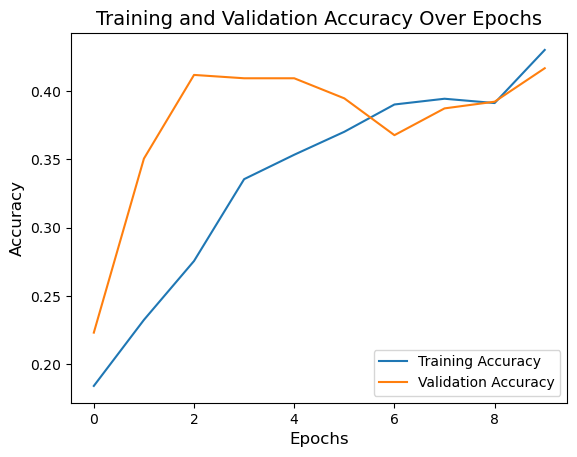

In [42]:
plot_accuracy(history)

 * The training accuracy improves across epochs, but the improvement seems to slow down before attaining an average accuracy. While it improves over time, the overall rate of improvement appears slow
 * The validation accuracy shows a fluctuated improvement, but there's no consistent trend upward. SImilar to the validation loss, it starts to decrease after some epochs, reflecting a lack of model generalization
 * The performance gap between training and validation accuracy further suggests the overfitting problem, where the validation accuracy shows a highly inconsistent behavior

##  <u>Solution 3D</u>

### **Improving the Model Accuracy**

> Let's try tuning the model to get the best hyperparameters for training and try improving the accuracy and reducing the loss further. 
> <br> We are implementing **Early Stopping** based on validation loss to prevent overfitting while still allowing the model to train adequately. We will also add **patience parameter** to define the number of consecutive epochs during which our validation performance (e.g., validation loss or accuracy) can fail to improve before the training is halted.
>
> <br> We would still be adding multiple parameters to tune it to give the best possible outcome including **setting up a tuner to find the best parameters, searching for the best parameters out of the tuner, retrieving the best hyperparameters found during the tuning process and then training the best model with suitable parameters** 

### **Function to Build our Model**

> Here, we will define a function which takes hyperparameters as its input and builds the Sequential model.
> <br>Keeping the previous architechture in place, we will add 1 input layer and multiple hidden layers
> <br>We will be adding a dynamic structure to aloow the number of layers and units per layer to be determined based on the hyperparameters
>
> <br> This will include - 
> * adding input, hidden, and output layers,
> * applying dropout and batch normalization to reduce overfitting,
> * compiling the model with categorical cross-entropy for multi-class classification and Adam optimizer with multiple learning rates

In [43]:
MAX_UNITS = 128 # Maximum starting units for input layer

def build_model(hp):
    model = Sequential()

    # Define the batch size as a hyperparameter
    batch_size = hp.Int('batch_size', min_value = 4, max_value = 16, step = 4)
    print(f"Batch size for this trial: {batch_size}")
    
    # Input Layer
    model.add(Dense(units = MAX_UNITS, input_shape = (X_train_scaled.shape[1],), 
                    activation = hp.Choice('activation_0', values = ['relu', 'tanh']), 
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_0', min_value = 0.1, max_value = 0.3, step = 0.1)))

    # Number of hidden layers
    num_layers = hp.Int('num_layers', min_value = 3, max_value = 5, step = 1)

    # Add hidden layers with decreasing units
    for i in range(1, num_layers):
        units = MAX_UNITS // (2 ** i)  # Halves the units for each subsequent layer
        model.add(Dense(units = units, 
                        activation = hp.Choice(f'activation_{i}', values = ['relu', 'tanh']),
                        kernel_initializer = 'he_normal'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value = 0.3, max_value = 0.5, step = 0.1)))

    # Output Layer, with 6 classes
    model.add(Dense(6, activation = 'softmax'))

    # Compile the model
    model.compile(optimizer = Adam(learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    model.summary()
    
    return model

### **Set up the Tuner**

> Next, to set up the tuner, we are using RandomSearch from Keras Tuner. this will help us perform hyperparameter tuning to search for the best combination of learning rate, number of layers, activation functions, dropout rates, and batch size
> <br> We will do the tuning process based on the validation accuracy to ensure we select a model that generalizes well
>
> We have also added early stopping to prevent overfitting

In [44]:
# Setting up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    executions_per_trial = 1,
    directory = 'signal_tuner_directory', 
    max_trials = 10,  
    project_name = 'signals_data'
)

# Setting up early stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

Batch size for this trial: 4


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,966 (50.65 KB)

 Trainable params: 12,518 (48.90 KB)

 Non-trainable params: 448 (1.75 KB)

### **Search for the Best Parameters**

> We will now search for the best parameter out of the tuner from previous step. This will help us explore various hyperparameter configurations within the provided ranges and find the one that achieves the highest validation accuracy


In [45]:
# Search for the best hyperparameters
tuner.search(X_train_scaled, y_train_encoded, 
             epochs = 10, 
             validation_data = (X_test_scaled, y_test_encoded), 
             callbacks = [early_stopping])

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.25735294818878174

Best val_accuracy So Far: 0.5759803652763367
Total elapsed time: 00h 01m 56s


### **Retrieve the Best Parameters and Build the Model**

> We will now get all the best parameters found during the tuning process. These include batch size, learning rate, activation functions, and dropout rates.


In [46]:
# To get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"\n Best Hyperparameters for training the model: {best_hps.values}")

# To build the model with the best hyperparameters
best_signal_model = tuner.hypermodel.build(best_hps)

# Printing final Input Layer and Hidden Layers Units
input_units = MAX_UNITS
hidden_units = [input_units // (2 ** i) for i in range(1, best_hps.get('num_layers'))]

print("\n Final Values to train the model - ")
print("   Batch Size - ", best_hps.get('batch_size'))
print(f"    Input Layer Units: {input_units}")
for i, units in enumerate(hidden_units, start = 1):
    activation_func = best_hps.get(f'activation_{i}') # To get the activation function for the layer
    dropout_rate = best_hps.get(f'dropout_{i}')  # To get the dropout rate for the layer
    print(f"    Hidden Layer {i} Units: {units}, Activation Function: {activation_func}, Dropout Rate: {dropout_rate}")




 Best Hyperparameters for training the model: {'batch_size': 8, 'activation_0': 'tanh', 'dropout_0': 0.1, 'num_layers': 3, 'activation_1': 'relu', 'dropout_1': 0.3, 'activation_2': 'relu', 'dropout_2': 0.5, 'learning_rate': 0.001, 'activation_3': 'relu', 'dropout_3': 0.5, 'activation_4': 'relu', 'dropout_4': 0.3}
Batch size for this trial: 8


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,966 (50.65 KB)

 Trainable params: 12,518 (48.90 KB)

 Non-trainable params: 448 (1.75 KB)


 Final Values to train the model - 
   Batch Size -  8
    Input Layer Units: 128
    Hidden Layer 1 Units: 64, Activation Function: relu, Dropout Rate: 0.3
    Hidden Layer 2 Units: 32, Activation Function: relu, Dropout Rate: 0.5


### **Train the Best Model with Suitable Parameters**

> Now that we have all the suitable parameters for our Neural netwok model, we will build the final model using these values and train it on the training dataset. We will use early stopping here as well to avoid overfitting


In [47]:
# Train the best model with suitable parameters
new_signal_history = best_signal_model.fit(X_train_scaled, y_train_encoded, 
                                   validation_data = (X_test_scaled, y_test_encoded),
                                   epochs = 50, 
                                   batch_size = best_hps.get('batch_size'),
                                   callbacks = [early_stopping])

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2008 - loss: 2.4567 - val_accuracy: 0.4559 - val_loss: 1.4331
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3363 - loss: 1.9332 - val_accuracy: 0.5294 - val_loss: 1.2433
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4348 - loss: 1.5821 - val_accuracy: 0.5613 - val_loss: 1.1232
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4663 - loss: 1.4280 - val_accuracy: 0.5686 - val_loss: 1.0825
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4701 - loss: 1.3159 - val_accuracy: 0.5833 - val_loss: 1.0354
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5088 - loss: 1.2886 - val_accuracy: 0.5588 - val_loss: 1.0267
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5217 - loss: 1.2207 - val_accuracy: 0.5882 - val_loss: 0.9990
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5222 - loss: 1.1488 - val_accuracy: 0.

In [48]:
train_loss, train_accuracy = best_signal_model.evaluate(X_train_scaled, y_train_encoded, verbose = 1)
test_loss, test_accuracy = best_signal_model.evaluate(X_test_scaled, y_test_encoded, verbose = 1)
output_data = {
    "Metrics": ["Accuracy", "Loss"],
    "Train Set": [format(train_accuracy, '.3f'), format(train_loss, '.3f')],
    "Test Set": [format(test_accuracy, '.3f'), format(test_loss, '.3f')]
}
pd.DataFrame(output_data).head()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5929 - loss: 0.9346 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6151 - loss: 0.9169 


,Metrics,Train Set,Test Set
0,Accuracy,0.583,0.588
1,Loss,0.962,0.969


> To quickly summarize the above:
>  *  The training accuracy improves here, indicating steady learning without major overfitting
>  * The loss consistently decreased, suggesting effective learning throughout training, however, we still have some optimizations possible
>  * Validation accuracy is aligned more closely with the training one, indicating improved generalization and minimal overfitting by the final epochs

##  <u>Solution 3E</u>

### **Plot Training Loss and Validation Loss**

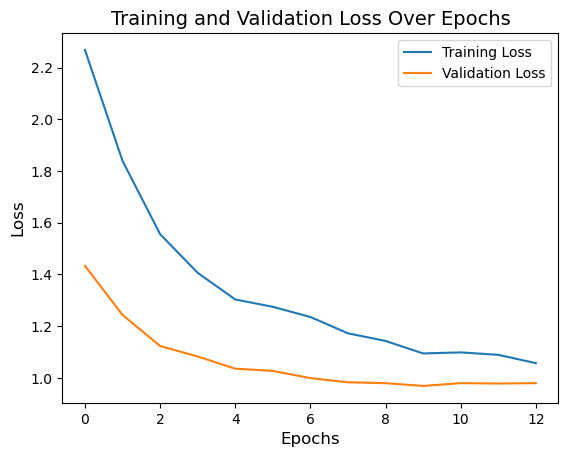

In [49]:
plot_loss(new_signal_history)

 * **Training Loss:**
     * The training loss decreases more consistently and there is a minimal fluctuation, only at the end of the process, showing better stability in the training process
     * The training loss curve indicates that the model is converging faster, as the slope becomes flatter much earlier, meaning the model learns efficiently
     <br><br>
  * **Validation Loss:**
     * The validation loss remains steady throughout and the gap between training and validation loss is much smaller, suggesting better generalization to unseen data
     * There are fluctuations, however, they are on the lesser differences, implying a more robust model

### **Plot Training Accuracy and Validation Accuracy**

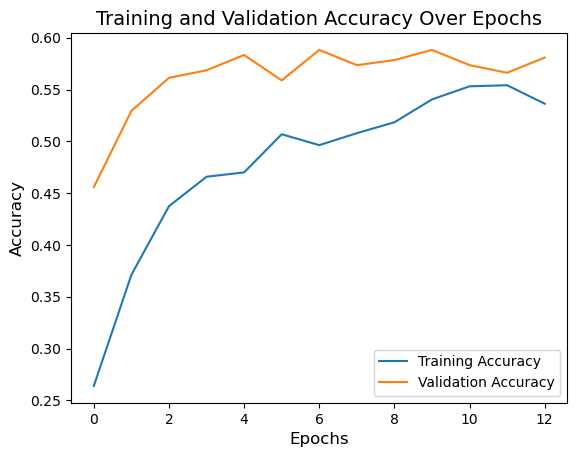

In [50]:
plot_accuracy(new_signal_history)

 * **Training Accuracy:**
     * The training accuracy improves at a faster pace 
     * The final accuracy level reaches a much higher value, indicating a more accurate model overall
     <br><br>
  * **Validation Accuracy:**
     * The validation loss remains steady throughout and the gap between training and validation loss is much smaller towards the end, suggesting better generalization to unseen data
     * There are fluctuations, however, they are on the lesser differences compared to the previous base model, implying a more robust model

### **Comparison of this Improved Model with Basic Model Earlier**

> * **Stability in Loss:** The loss values fluctuate more, both in training and validation in the basic model which suggest instability during learning, however, after improvement, the loss values are smoother and converge quicker, with less fluctuation. This suggests that the model learns more efficiently and stabilizes sooner
> 
> * **Generalization:** There is a clear gap between training and validation loss/accuracy, before improvement, indicating overfitting. However, the gap between training and validation performance is much smaller, in improved model which means the model generalizes better to new, unseen data
> 
> * **Model Efficiency:** The basic model seems to struggle with balancing learning and generalization, hence overfits. However, improvements in loss minimization and accuracy progression reflect a more efficient and well-tuned model, which is both stable and better at generalizing
> 
> * **Accuracy Progression:** The training accuracy improves but flattens early, and validation accuracy is also inconsistent in the basic model. Whereas, Training accuracy improves at a steady rate, and validation accuracy follows a consistent upward trend, showing overall better learning in the improved version of our model

***
***
# <u>PART B</u>
***

##  <u>Solution 1A</u>

### **Reading the file and assigning it to a variable**

In [51]:
svhn_file_path = "C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Module 8 - Intro to Neural Networks (Week 28 to Week 31)/Project/Autonomous_Vehicles_SVHN_single_grey1.h5"
svhn_file_name = os.path.basename(svhn_file_path)

In [52]:
try:
    svhn = h5py.File(svhn_file_path, 'r')
    print(f"File '{svhn_file_name}' successfully opened!")

except OSError:
    print(f"Error: File '{svhn_file_name}' could not be opened.")

File 'Autonomous_Vehicles_SVHN_single_grey1.h5' successfully opened!


### **Getting the File Size**

In [53]:
svhn_file_size = os.path.getsize(svhn_file_path) / (1024 * 1024)
print(f"File '{svhn_file_name}' \nSize: {svhn_file_size:.2f} MB")

File 'Autonomous_Vehicles_SVHN_single_grey1.h5' 
Size: 468.87 MB


> The file is successfully opened and it's size is also calculated <br> We have added error handling to alert in case the file cannot be opened, ensuring robustness in the file reading process

##  <u>Solution 1B</u>

In [54]:
# Printing all keys in the .h5 file
keys = list(svhn.keys())
if keys:
    print(f"Keys in '{svhn_file_name}':", keys, "\n")
    
    for key in svhn.keys():
        dataset = svhn[key] # To access the dataset
        print(f" Dataset name: '{key}' has a Data type of: {dataset.dtype}")
else:
    print(f"No keys (datasets or groups) found in '{svhn_file_name}'.")

Keys in 'Autonomous_Vehicles_SVHN_single_grey1.h5': ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'] 

 Dataset name: 'X_test' has a Data type of: float32
 Dataset name: 'X_train' has a Data type of: float32
 Dataset name: 'X_val' has a Data type of: float32
 Dataset name: 'y_test' has a Data type of: uint8
 Dataset name: 'y_train' has a Data type of: uint8
 Dataset name: 'y_val' has a Data type of: uint8


##  <u>Solution 1C</u>

> Since our .h5 file has all the training, testing and validation data, we'll be using the same to map them to the X_train, X_test, Y_train and Y_test as per the ask.

In [55]:
X_train = svhn.get('X_train')
X_test = svhn.get('X_test')
Y_train = svhn.get('y_train')
Y_test = svhn.get('y_test')
X_val = svhn.get('X_val')
Y_val = svhn.get('y_val')

> Since, the file also contains the validation data (X_val, y_val), we have also map the (X_val and y_val) sets to (X_val and Y_val). However, validation data will be only used as the validation set when we train our model and the performance metrics will be calculated based on the test sets. This will ensure our model performs on unseen data,

***
##  <u>Solution 2A</u>

### **Printing the shapes for Training and Testing Set**

In [56]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Y_val shape: {Y_val.shape}")

X_train shape: (42000, 32, 32)
Y_train shape: (42000,)
X_test shape: (18000, 32, 32)
Y_test shape: (18000,)
X_val shape: (60000, 32, 32)
Y_val shape: (60000,)


### **Validating if data is in Sync**

In [57]:
if X_train.shape[0] == Y_train.shape[0] and X_test.shape[0] == Y_test.shape[0] and X_val.shape[0] == Y_val.shape[0]:
    print("X and Y are in sync for both training and testing sets!")
else:
    print("Mismatch in the number of samples between X and Y!")

X and Y are in sync for both training and testing sets!


##  <u>Solution 2B</u>

> To achieve the plot visualization of first 10 images in training data, we'll use a 2X5 grid to have the image and it's label name below it. This will hep naming the respective images. We'll be using Red, Blue, Yellow scale for the images

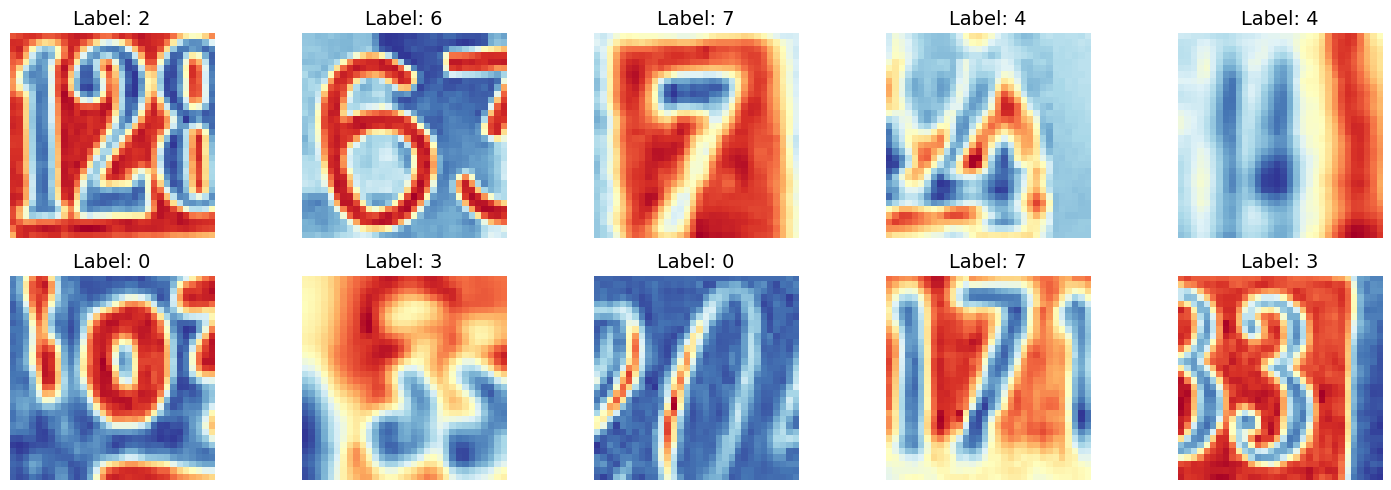

In [58]:
num_images = 10 # Defining the number of images to display

plt.figure(figsize = (15, 5)) # Adding the figure size

# Looping through the first 10 images
for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # To create a 2-row by 5-column grid
    plt.imshow(X_train[i], cmap = 'RdYlBu')  # To display the image in red, yellow and blue colors
    plt.title(f"Label: {Y_train[i]}", fontsize = 14)  # To print the corresponding labels
    plt.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()  # To display the the plot

##  <u>Solution 2C</u>

> To reshape the original images, we would first have to convert our dataset to numPy Arrays. This would be necessary to use the NumPy methods, including the reshape() method for conversion

In [59]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
X_val_np = np.array(X_val)

X_train_np.shape, X_test_np.shape, X_val_np.shape

((42000, 32, 32), (18000, 32, 32), (60000, 32, 32))

> Now, for reshaping, we have 2 options:
> * We can flatten all input features from the image into a single vector. For instance, our X_train, X_test and X_val datasets have **32 X 32 pixel size. This will be converted to a vector of 1024**, i.e., a 2D input format (number of samples, number of features). While this type, i.e., fully connected networks **(Dense Networks)** do not retain any spatial information from the images, they effectively learn complex patterns for classification tasks
> * Another approach involves extracting features from images to learn spatial hierarchies, enhancing pattern recognition for effective multi-dimensional input processing. This maintains the 4D shape (num_samples, height, width, channels)for **CNNs**, where channels indicate color information. For instance, our X_train, X_test, and X_val datasets will change from **32 X 32 pixel size to 32 X 32 X 1**, where 1 represents a grayscale image with a single channel

> For our file, we will follow the **Dense Network approach** as:
> * It effectively captures the number patterns
> * Easily handles the variability in digit appearance
> * It is good in getting the accuracy of getting multi-digit numbers from street-level photographs for our data

In [60]:
# To get the original shape of the train and test set
X_train_original_shape = X_train_np.shape
X_test_original_shape = X_test_np.shape
X_val_original_shape = X_val_np.shape

# Reshape the images
# Adding channel dimension as 1 for Grayscale channel:
X_train = X_train_np.reshape(X_train_original_shape[0], -1)
X_test = X_test_np.reshape(X_test_original_shape[0], -1)
X_val = X_val_np.reshape(X_val_original_shape[0], -1)

# Print the new shapes to verify the changes
print(f"New X_train shape: {X_train.shape}")
print(f"New X_test shape: {X_test.shape}")
print(f"New X_val shape: {X_val.shape}")

New X_train shape: (42000, 1024)
New X_test shape: (18000, 1024)
New X_val shape: (60000, 1024)


##  <u>Solution 2D</u>

> To normalize the pixel values,
> * First, we convert the pixel values to 'float32' to ensure precision during normalization. Since out X_train and X_test datasets already have 'float32' datatype, we will be skipping this step for them but we'll do this for X_val dataset
> * Then, since our dataset has 'uint8' type data, we will divide it by 255.0 to scale the pixel values from a range of [0, 255] to [0, 1]
> * Lastly, we will print the minimum and maximum values of our datasets to ensure normalization was successful

In [61]:
# Verifying the new range of pixel values
data = {
    "Dataset": ["X_train", "X_test", "X_val"],
    "Min Value": [X_train.min(), X_test.min(), X_val.min()],
    "Max Value": [X_train.max(), X_test.max(), X_val.max()]
}
print("\nBefore Normalization - ")
pd.DataFrame(data).head()


Before Normalization - 


,Dataset,Min Value,Max Value
0,X_train,0.0,254.974503
1,X_test,0.0,254.974503
2,X_val,0.0,254.974503


In [62]:
# Normalizing the pixel values

X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val.astype('float32') / 255.0

In [63]:
# Verifying the new range of pixel values
data = {
    "Dataset": ["X_train", "X_test", "X_val"],
    "Min Value": [X_train.min(), X_test.min(), X_val.min()],
    "Max Value": [X_train.max(), X_test.max(), X_val.max()]
}
print("\nAfter Normalization - ")
pd.DataFrame(data).head()


After Normalization - 


,Dataset,Min Value,Max Value
0,X_train,0.0,0.9999
1,X_test,0.0,0.9999
2,X_val,0.0,0.9999


##  <u>Solution 2E</u>

> To transform the labels into a format suitable for the neural network, we will be doing the keras encoding using 'to_categorical' function which will convert the class labels into one-hot encoded vectors

### **Getting Unique Values in Y_train and Y_test**

In [64]:
print(f"Unique classes in Y_train: {np.unique(Y_train)}")
print(f"Unique classes in Y_test: {np.unique(Y_test)}")
print(f"Unique classes in Y_val: {np.unique(Y_val)}")

Unique classes in Y_train: [0 1 2 3 4 5 6 7 8 9]
Unique classes in Y_test: [0 1 2 3 4 5 6 7 8 9]
Unique classes in Y_val: [0 1 2 3 4 5 6 7 8 9]


### **Transforming the Labels**

In [65]:
num_classes = len(np.unique(Y_train)) # # Checking the number of unique classes instead of hardcoding

Y_train_encoded = to_categorical(Y_train, num_classes)

print(f"\nY_train_encoded shape: {Y_train_encoded.shape}")

Y_train_encoded_df = pd.DataFrame(Y_train_encoded)
Y_train_encoded_df.head()


Y_train_encoded shape: (42000, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [66]:
Y_test_encoded = to_categorical(Y_test, num_classes)

print(f"\nY_test_encoded shape: {Y_test_encoded.shape}")

Y_test_encoded_df = pd.DataFrame(Y_test_encoded)
Y_test_encoded_df.head()


Y_test_encoded shape: (18000, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
Y_val_encoded = to_categorical(Y_val, num_classes)

print(f"\nY_val_encoded shape: {Y_val_encoded.shape}")

Y_val_encoded_df = pd.DataFrame(Y_val_encoded)
Y_val_encoded_df.head()


Y_val_encoded shape: (60000, 10)


,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  <u>Solution 2F</u>

> Ideally, printing only one of the Y_train or Y_test classes should suffice, because they are expected to be same, however, let's print the number of unique classes in both the datasets

In [68]:
total_classes_train = len(np.unique(Y_train))
total_classes_test = len(np.unique(Y_test))
total_classes_val = len(np.unique(Y_val))

print("\n Total number of unique classes in the Datasets Before Encoding - \n")
print(f"     Training Dataset: {total_classes_train} which are {np.unique(Y_train)}")
print(f"     Testing Dataset: {total_classes_test} which are {np.unique(Y_test)}")
print(f"     Validation Dataset: {total_classes_val} which are {np.unique(Y_val)}\n")


 Total number of unique classes in the Datasets Before Encoding - 

     Training Dataset: 10 which are [0 1 2 3 4 5 6 7 8 9]
     Testing Dataset: 10 which are [0 1 2 3 4 5 6 7 8 9]
     Validation Dataset: 10 which are [0 1 2 3 4 5 6 7 8 9]



In [69]:
total_classes_train_encoded = len(np.unique(Y_train_encoded))
total_classes_test_encoded = len(np.unique(Y_test_encoded))
total_classes_val_encoded = len(np.unique(Y_val_encoded))

print("\n Total number of unique classes in the Datasets After Encoding - \n")
print(f"     Training Dataset: {total_classes_train_encoded} which are {np.unique(Y_train_encoded)}")
print(f"     Testing Dataset: {total_classes_val_encoded} which are {np.unique(Y_val_encoded)}")
print(f"     Validation Dataset: {total_classes_val_encoded} which are {np.unique(Y_val_encoded)}\n")


 Total number of unique classes in the Datasets After Encoding - 

     Training Dataset: 2 which are [0. 1.]
     Testing Dataset: 2 which are [0. 1.]
     Validation Dataset: 2 which are [0. 1.]



***
### **Checking the Initial Accuracy with Random Forest Model**
<br>

>Before proceeding with next parts and creating a neural network model, let's check the metrics for our model using Random Forest

In [70]:
# Model
model_RF = RandomForestClassifier(n_estimators = 100,
                                    criterion = 'gini',
                                    max_depth = 5)
model_RF.fit(X_train, Y_train)

# Accuracy
pred_train_RF = model_RF.predict(X_train)
pred_RF = model_RF.predict(X_test)

# Accuracy

RF_Train = model_RF.score(X_train, Y_train)
RF_Test = accuracy_score(Y_test, pred_RF)   

# Recall
RF_Train_recall = recall_score(Y_train, pred_train_RF,average = 'weighted')
RF_Test_recall = recall_score(Y_test, pred_RF,average = 'weighted')   

# Precision
RF_Train_precision = precision_score(Y_train, pred_train_RF,average = 'weighted')
RF_Test_precision = precision_score(Y_test, pred_RF,average = 'weighted')   

# F1 score
RF_Train_f1 = f1_score(Y_train, pred_train_RF,average = 'weighted')
RF_Test_f1 = f1_score(Y_test, pred_RF,average = 'weighted') 

output_data = {
    "Metrics": ["Train Set", "Test Set"],
    "Accuracy": [format(RF_Train, '.3f'), format(RF_Test, '.3f')],
    "Recall": [format(RF_Train_recall, '.3f'), format(RF_Test_recall, '.3f')],
    "Precision": [format(RF_Train_precision, '.3f'), format(RF_Test_precision, '.3f')],
    "F1-Score": [format(RF_Train_f1, '.3f'), format(RF_Test_f1, '.3f')]
}
print("\nOutput Data - ")
pd.DataFrame(output_data).head()


Output Data - 


,Metrics,Accuracy,Recall,Precision,F1-Score
0,Train Set,0.440,0.440,0.470,0.443
1,Test Set,0.417,0.417,0.449,0.421


> The accuracy scores for the Random Forest model show a moderate performance, with a training and testing accuracy of less than 50%. The low precision and recall metrics indicate significant room for improvement in accurately classifying multi-digit numbers from street-level imagery
> <br> Let's train our model with Neural Network further

***
##  <u>Solution 3A</u>

> We'll now proceed with designing a Neural Network to train a classifier on our dataset. <br> This will include:
> * The initializer, Sequential
> * The number of layers (input, hidden, output)
> * The number of units in each layer
> * The types of activation functions
> * Regularization techniques like dropout, etc

In [71]:
# Resetting the session
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Initializing the Sequential model**

In [72]:
svhn_model = Sequential()
print(svhn_model)

<Sequential name=sequential, built=False>


### **Adding Input Layers**

In [73]:
# Number of input features (input_dim) = X_train.shape[1]
svhn_model.add(Dense(512, input_dim = X_train.shape[1], activation = 'relu')) 
# svhn_model.add(BatchNormalization())
print(svhn_model)

<Sequential name=sequential, built=True>


### **Defining the Hidden layers**

In [74]:
# Hidden Layer 1
svhn_model.add(Dense(256, activation = 'sigmoid')) # Using Sigmoid as Activation Function
svhn_model.add(Dropout(0.4))  # Adding dropout to prevent overfitting

# Hidden Layer 2
svhn_model.add(Dense(128, activation = 'relu')) # Using ReLu as Activation Function
svhn_model.add(Dropout(0.4))  # Adding dropout to prevent overfitting

# Hidden Layer 3
svhn_model.add(Dense(64, activation = 'sigmoid')) # Using Sigmoid as Activation Function
svhn_model.add(Dropout(0.4))  # Adding dropout to prevent overfitting

print(svhn_model)

<Sequential name=sequential, built=True>


### **Output Layer**

In [75]:
# Output Layer: took the number of clases from previously defined num_classes with softmax activation
svhn_model.add(Dense(num_classes, activation = 'softmax'))  # here, num_classes is 9 for our dataset
print(svhn_model)

<Sequential name=sequential, built=True>


### **Printing the architecture**

 We'll print the model summary here.
  * It shows how our neural network is constructed layer by layer, with the key features of each layer:
  * The model type is sequential, meaning layers are added one after another in a simple stack, without any branching or looping
  * It also gives the name and type of layer, the shape of the data as it leaves the layer, and the number of trainable parameters in that layer

In [76]:
svhn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 697,930 (2.66 MB)

 Trainable params: 697,930 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

> We have finished designing our Basic Neural Network for our dataset!
> Our Neural Network has below:
> * **Input Layer:** The number of units are matching with the number of features (columns) in our dataset
> * **Hidden Layer:** We've added 3 hidden layers with ReLU activation for now. This will help to to introduce non-linearity
> * **Output layer:** Since this is a multi-class classification problem with 9 classes, we have used softmax activation

> As discussed earlier, since our target variable has more than 2 classes, we have used **Softmax Activation Function** in the output layer of our neural network instead of Sigmoid, which is generally used for a binary class scenario. This will ensure that only one class is predicted with the highest probability while the others receive lower probabilities. <br><br> We have also used **ReLU (Rectified Linear Unit)** as the Activation Function for the hidden layers to introduce non-linearity


### **Compile the model**

 * We will specify an optimizer, loss function and a metrics
 * Optimizer being used is Adam optimizer for better convergence
 * We'll be using categorical_crossentropy as loss function since we have multi-class classification

In [77]:
# Compiling the model to define how our model will learn and evaluate
svhn_model.compile(optimizer = Adam(learning_rate = 0.001),   # so we have adaptive learning rates
              loss = 'categorical_crossentropy',         # for multi-class classification
              metrics = ['accuracy'])
print(svhn_model)

<Sequential name=sequential, built=True>


### **Train the Basic Model**

In [78]:
# Setting up early stopping
# svhn_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Training the basic model
svhn_history = svhn_model.fit(X_train, Y_train_encoded, 
                    validation_data = (X_val, Y_val_encoded),
                    epochs = 20, batch_size = 32)
                    #callbacks = [svhn_early_stopping], verbose = 1)

# Evaluating the model on train data
svhn_train_loss, svhn_train_accuracy = svhn_model.evaluate(X_train, Y_train_encoded, verbose = 1)
print(f"Train Loss: {svhn_train_loss:.4f}, Train Accuracy: {svhn_train_accuracy:.4f}")

# Evaluating the model on test data
svhn_test_loss, svhn_test_accuracy = svhn_model.evaluate(X_test, Y_test_encoded, verbose = 1)
print(f"Test Loss: {svhn_test_loss:.4f}, Test Accuracy: {svhn_test_accuracy:.4f}")

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1004 - loss: 2.3490 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.0978 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.0971 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.0988 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.0984 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.0995 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.0992 -

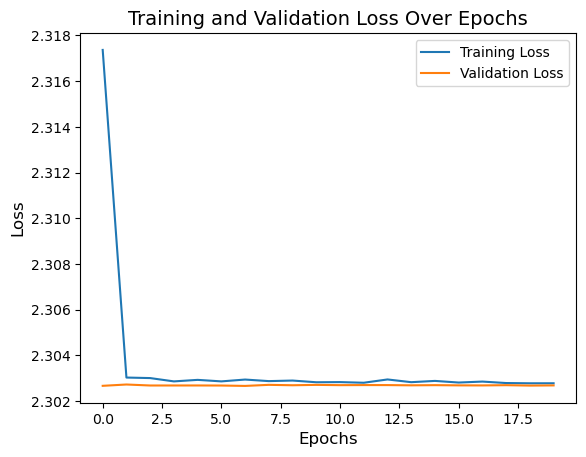

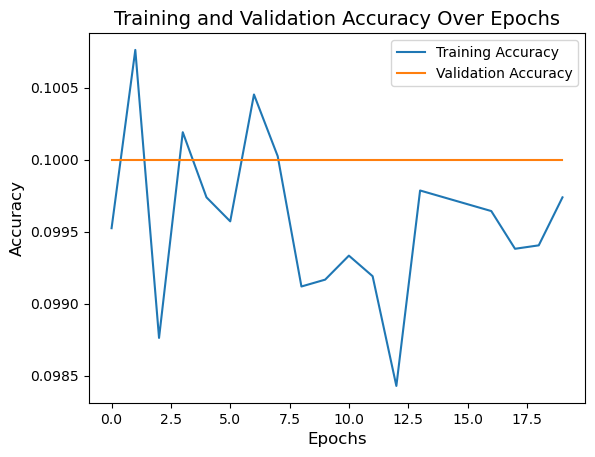

In [79]:
# Plot loss
plot_loss(svhn_history)

# Plot accuracy
plot_accuracy(svhn_history)

# Display both plots
plt.show()

> This is our Basic Neural Network Model which shows an inconsistency in the training and validation loss and accuracy. We see that:
> *  The training and validation loss remain nearly flat, which suggests that our basic model isn't improving its generalization significantly over the epochs and both training and validation loss remain constant throughout.
> * While the training accuracy has a very high fluctuation, the validation accuracy remains constant thoughout to a single value. Both the accuracies do not show any closenes between each other which shows a highly unstable basic model
>
> Given these observations, we would need to revisit the initial parameters and explore further tuning strategies. Our goal would be to reduce the overall loss and improve both training and validation accuracy


##  <u>Solution 3B</u>

In [80]:
# Resetting the session
backend.clear_session()
np.random.seed(101)
random.seed(101)
tf.random.set_seed(101)

> Now that we have designed a Neural Network model and also seen the basic architecture for the same, let's proceed to now train our model with the best suitable parameters. Though, we will be using the previously designed model as the base, we would still be adding multiple parameters to tune it to give the best possible outcome. For this, we will be doing the following steps:
> * Create a function to build the model
> * Set up a tuner to find the best parameters
> * Search for the best parameters out of the tuner
> * Retrieve the best hyperparameters found during the tuning process
> * Train the best model with suitable parameters

Let's start with the process

### **Function to Build our Model**

> Here, we will define a function which takes hyperparameters as its input and builds the Sequential model.
> <br>Keeping the previous architechture in place, we will add 1 input layer and multiple hidden layers
> <br>We will be adding a dynamic structure to aloow the number of layers and units per layer to be determined based on the hyperparameters
>
> <br> This will include - 
> * adding input, hidden, and output layers,
> * applying dropout and batch normalization to reduce overfitting,
> * compiling the model with categorical cross-entropy for multi-class classification and Adam optimizer with multiple learning rates

In [81]:
MAX_UNITS = 512 # Maximum starting units for input layer

def build_model(hp):
    model = Sequential()

    # Define the batch size as a hyperparameter
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)
    print(f"Batch size for this trial: {batch_size}")
    
    # Input Layer
    model.add(Dense(units=MAX_UNITS, input_shape=(X_train.shape[1],), 
                    activation=hp.Choice('activation_0', values=['relu', 'tanh']), 
                    kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_0', min_value=0.2, max_value=0.5, step=0.1)))

    # Number of hidden layers
    num_layers = hp.Int('num_layers', min_value=3, max_value=6, step=1)

    # Add hidden layers with decreasing units
    for i in range(1, num_layers):
        units = MAX_UNITS // (2 ** i)  # Halve the units for each subsequent layer
        model.add(Dense(units=units, 
                        activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh']),
                        kernel_initializer='he_normal'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    
    return model

### **Set up the Tuner**

> Next, to set up the tuner, we are using RandomSearch from Keras Tuner. this will help us perform hyperparameter tuning to search for the best combination of learning rate, number of layers, activation functions, dropout rates, and batch size
> <br> We will do the tuning process based on the validation accuracy to ensure we select a model that generalizes well
>
> We have also added early stopping to prevent overfitting

In [82]:
# Setting up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    executions_per_trial = 1,
    directory = 'tuner_directory', 
    max_trials = 10,  
    project_name = 'svhn_autonomous_vehicle'
)

# Setting up early stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)


Batch size for this trial: 32


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,898 (2.65 MB)

 Trainable params: 692,106 (2.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

### **Search for the Best Parameters**

> We will now search for the best parameter out of the tuner from previous step. This will help us explore various hyperparameter configurations within the provided ranges and find the one that achieves the highest validation accuracy

In [83]:
# Search for the best hyperparameters
tuner.search(X_train, Y_train_encoded, 
             epochs = 10, 
             validation_data = (X_val, Y_val_encoded), 
             callbacks = [early_stopping])

Trial 10 Complete [00h 06m 31s]
val_accuracy: 0.4473833441734314

Best val_accuracy So Far: 0.7235666513442993
Total elapsed time: 00h 57m 38s


### **Retrieve the Best Parameters and Build the Model**

> We will now get all the best parameters found during the tuning process. These include batch size, learning rate, activation functions, and dropout rates.

In [84]:
# To get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"\n Best Hyperparameters: {best_hps.values}")

# To build the model with the best hyperparameters
best_svhn_model = tuner.hypermodel.build(best_hps)

# Printing final Input Layer and Hidden Layers Units
input_units = MAX_UNITS
hidden_units = [input_units // (2 ** i) for i in range(1, best_hps.get('num_layers'))]

print("\n Final Values - ")
print("   Batch Size - ", best_hps.get('batch_size'))
print(f"    Input Layer Units: {input_units}")
for i, units in enumerate(hidden_units, start = 1):
    activation_func = best_hps.get(f'activation_{i}') # To get the activation function for the layer
    dropout_rate = best_hps.get(f'dropout_{i}')  # To get the dropout rate for the layer
    print(f"    Hidden Layer {i} Units: {units}, Activation Function: {activation_func}, Dropout Rate: {dropout_rate}")



 Best Hyperparameters: {'batch_size': 96, 'activation_0': 'relu', 'dropout_0': 0.2, 'num_layers': 3, 'activation_1': 'relu', 'dropout_1': 0.30000000000000004, 'activation_2': 'relu', 'dropout_2': 0.2, 'learning_rate': 0.0001, 'activation_3': 'relu', 'dropout_3': 0.30000000000000004, 'activation_4': 'relu', 'dropout_4': 0.30000000000000004, 'activation_5': 'relu', 'dropout_5': 0.2}
Batch size for this trial: 96


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,898 (2.65 MB)

 Trainable params: 692,106 (2.64 MB)

 Non-trainable params: 1,792 (7.00 KB)


 Final Values - 
   Batch Size -  96
    Input Layer Units: 512
    Hidden Layer 1 Units: 256, Activation Function: relu, Dropout Rate: 0.30000000000000004
    Hidden Layer 2 Units: 128, Activation Function: relu, Dropout Rate: 0.2


### **Train the Best Model with Suitable Parameters**

> Now that we have all the suitable parameters for our Neural netwok model, we will build the final model using these values and train it on the training dataset. We will use early stopping here as well to avoid overfitting

In [85]:
# Train the best model with suitable parameters
new_svhn_history = best_svhn_model.fit(X_train, Y_train_encoded, 
                                   validation_data = (X_val, Y_val_encoded),
                                   epochs = 50, 
                                   batch_size = best_hps.get('batch_size'),
                                   callbacks = [early_stopping])  


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.1487 - loss: 2.7137 - val_accuracy: 0.3779 - val_loss: 1.8475
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.3472 - loss: 1.9298 - val_accuracy: 0.5545 - val_loss: 1.4015
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.4878 - loss: 1.5446 - val_accuracy: 0.6360 - val_loss: 1.1872
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5590 - loss: 1.3538 - val_accuracy: 0.6428 - val_loss: 1.1198
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6002 - loss: 1.2411 - val_accuracy: 0.6757 - val_loss: 1.0367
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6272 - loss: 1.1838 - val_accuracy: 0.7097 - val_loss: 0.9578
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6425 - loss: 1.1282 - val_accuracy: 0.6945 - val_loss: 0.9807
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.6503 - loss: 1.1020 - 

> To quickly summarize the above:
>  * In the initial epochs, the model shows significant improvement in both training accuracy and validation accuracy which suggests that our model is quickly learning from the data
>  * The models tabilizes by 30th epoch showing our model is still learning, but improvements are slowing down. The validation loss is stable with very minor fluctuations
>  * We also see that the gap between training and validation accuracy remains small most of the times, with validation accuracy sometimes surpassing training accuracy. This implies good generalization

##  <u>Solution 3C</u>

> To evaluate the performance of our model, let's create a function that takes the X_train, X_test, Y_train, Y_test sets along with the model and returns a table with Training and validation Loss and Accuracy

In [86]:
def performance_metrics(X_train, X_test, Y_train, Y_test, model):
    train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose = 1)
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose = 1)
    
    # Generate predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Convert predictions from probabilities to class labels
    Y_train_pred_classes = np.argmax(Y_train_pred, axis = 1)
    Y_test_pred_classes = np.argmax(Y_test_pred, axis = 1)

    # Convert one-hot encoded labels to class labels
    Y_train_classes = np.argmax(Y_train, axis = 1)
    Y_test_classes = np.argmax(Y_test, axis = 1)
    
    output_data = {
        "Metrics": ["Accuracy", "Loss"],
        "Train Set": [format(train_accuracy, '.3f'), format(train_loss, '.3f')],
        "Test Set": [format(test_accuracy, '.3f'), format(test_loss, '.3f')]
    }
        
    # Generate classification report
    train_report = classification_report(Y_train_classes, Y_train_pred_classes, output_dict = True)
    test_report = classification_report(Y_test_classes, Y_test_pred_classes, output_dict = True)
    
    # Confusion matrices
    train_confusion = confusion_matrix(Y_train_classes, Y_train_pred_classes)
    test_confusion = confusion_matrix(Y_test_classes, Y_test_pred_classes)
    
    # Display results
    print("\nPerformance Metrics - ")
    print(f"   Train Accuracy: {train_accuracy:.4f}")
    print(f"   Test Accuracy: {test_accuracy:.4f}")
    
    # Print detailed reports
    print("\nTraining Classification Report:\n", pd.DataFrame(train_report).transpose())
    print("\nTesting Classification Report:\n", pd.DataFrame(test_report).transpose())

    # Plotting confusion matrices
    fig, axes = plt.subplots(1, 2, figsize = (12, 5))
    
    sns.heatmap(train_confusion, annot = True, fmt = 'd', cmap = 'Blues', 
                ax = axes[0], cbar = False, 
                xticklabels = np.arange(1, num_classes + 1), 
                yticklabels = np.arange(1, num_classes + 1))
    axes[0].set_title('Training Confusion Matrix')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(test_confusion, annot = True, fmt = 'd', cmap = 'Blues', 
                ax = axes[1], cbar = False, 
                xticklabels = np.arange(1, num_classes + 1), 
                yticklabels = np.arange(1, num_classes + 1))
    axes[1].set_title('Testing Confusion Matrix')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()
    return pd.DataFrame(output_data).head()



Performance Metrics - 

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8284 - loss: 0.5394
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8099 - loss: 0.6226
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Performance Metrics - 
   Train Accuracy: 0.8306
   Test Accuracy: 0.8071

Training Classification Report:
               precision    recall  f1-score       support
0              0.824596  0.890588  0.856322   4186.000000
1              0.818806  0.857862  0.837879   4172.000000
2              0.886139  0.810341  0.846546   4197.000000
3              0.857143  0.766643  0.809371   4281.000000
4              0.738374  0.902340  0.812164   4188.000000
5              0.805266  0.838374  0.821486   4232.000000
6              0.845902  0.804702  0.824788   4168.000000
7              0.898849  0.875477  0.887009   4192.000000
8              0.880890  0.727555  0.796914   4188.000000
9              0.793424  0.833889  0.813154   4196

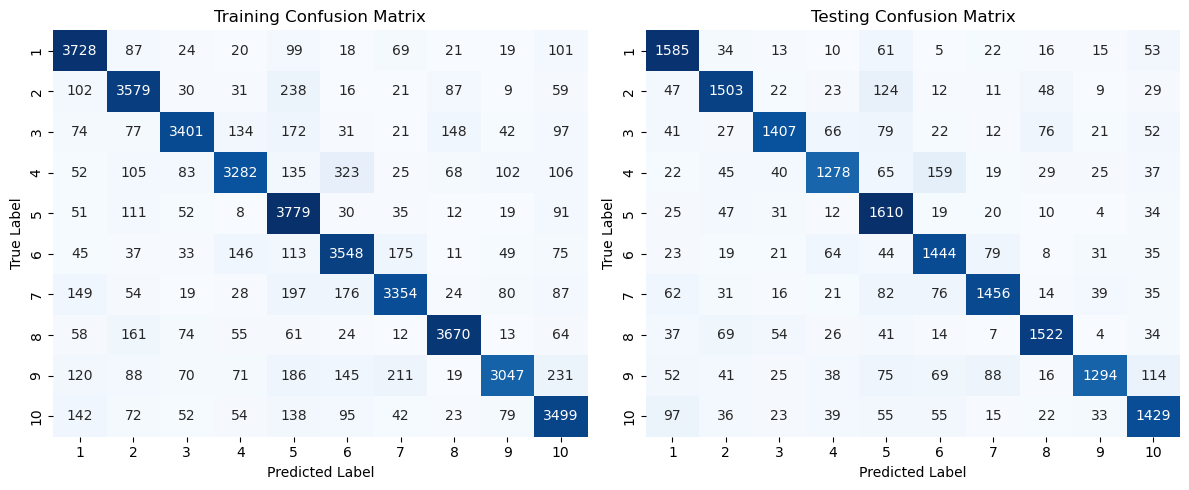

,Metrics,Train Set,Test Set
0,Accuracy,0.831,0.807
1,Loss,0.538,0.635


In [87]:
print("\nPerformance Metrics - \n")
performance_metrics(X_train, X_test, Y_train_encoded, Y_test_encoded, best_svhn_model)

Based on above performance metrics, we see below points:
 * **Accuracy -**
     - Our final model achieved a good training and testing accuracy
     - The values being close to each other demonstrate a good overall performance
     - This indicates that our model is able to effectively recognize multi-digit numbers from street-level imagery
     <br><br>
 * **Training and validation Loss -**
     - The training and validation loss values highlight that while our model learns well from the training data, it still faces challenges when applied to unseen data
     - We might need to further check on improving the loss to accurately so as to minimize the  impact on real-world scenarios
     <br><br>
 * **Precision and recall -**
     - We also see a strong precision and recall for several digits which ensures that there are most of the times when the model identifies a number, it is correct
     - This is important from domain perspective to gain trust
     <br><br>
 * **Confusion Matrix -**
     - We can see from the matrices that there are specific digits, which are prone to misclassification
     - We can see this is primarily occurring between similar-looking digits, such as '1' and '7'
     <br><br>
 * The macro and weighted averages for precision, recall, and f1-score are fairly balanced in both training and testing, showing the model handles all classes reasonably well overall. This is a sign of a **balanced model**

##  <u>Solution 3D</u>

> We require 4 plots in this part - 
> * Training Loss Vs Epochs
> * Validation Loss Vs Epochs
> * Training Accuracy Vs Epochs
> * Validation Accuracy Vs Epochs

In [88]:
# Extracting training and validation metrics
train_loss = new_svhn_history.history['loss']
val_loss = new_svhn_history.history['val_loss']
train_accuracy = new_svhn_history.history['accuracy']
val_accuracy = new_svhn_history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

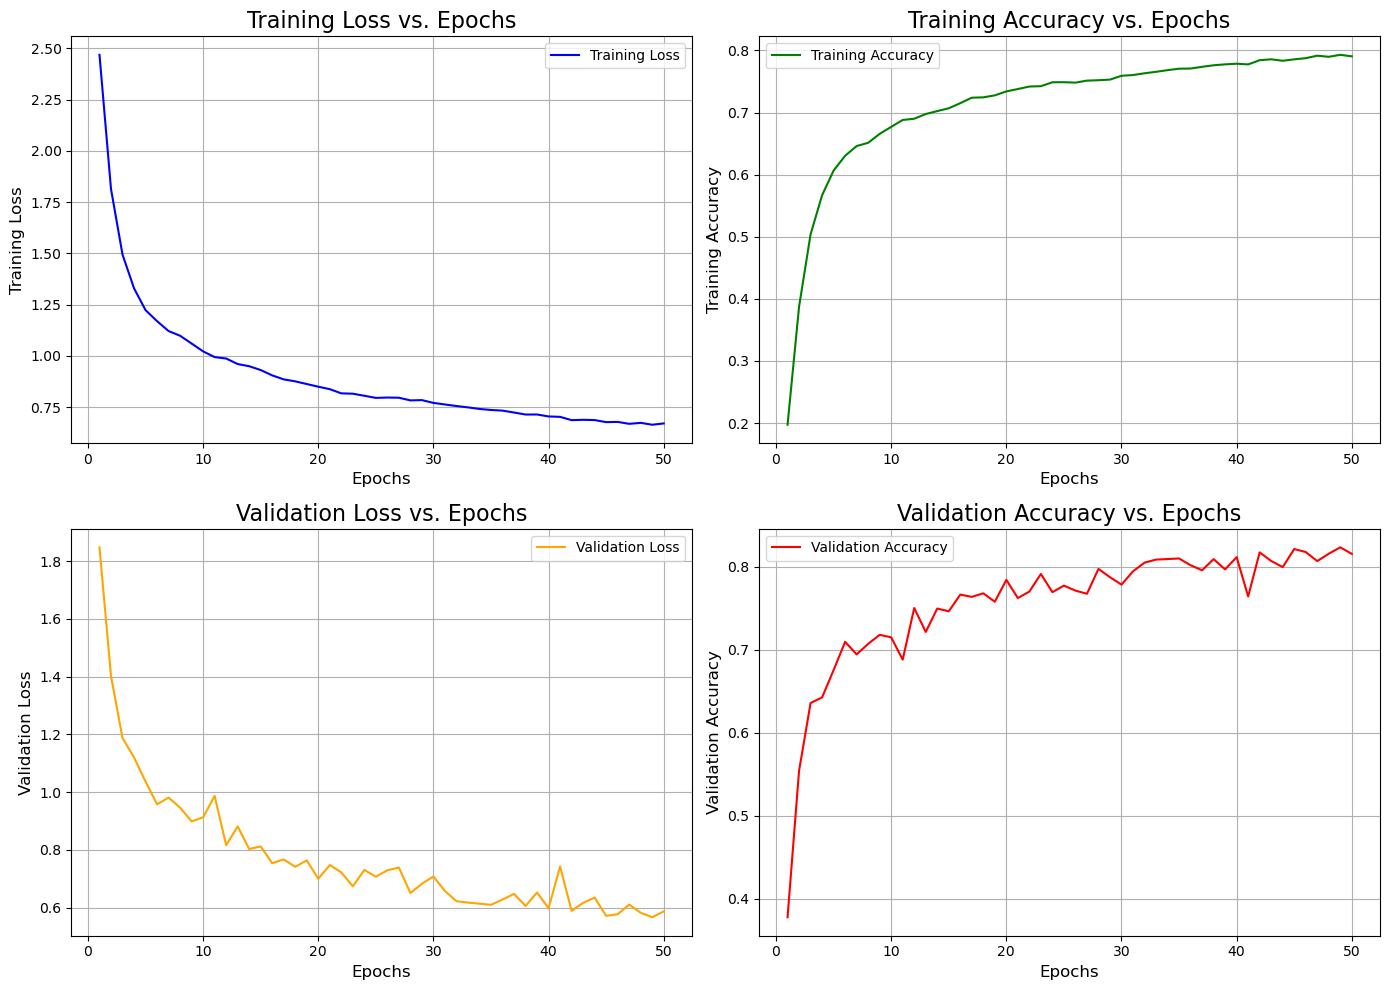

In [89]:
# Creating a figure with 4 subplots arranged in a 2x2 layout
plt.figure(figsize = (14, 10))

# Subplot for Training Loss vs Epochs
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss, label = 'Training Loss', color = 'blue')
plt.title('Training Loss vs. Epochs', fontsize = 16)
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Training Loss', fontsize = 12)
plt.legend()
plt.grid()

# Subplot for Training Accuracy vs Epochs
plt.subplot(2, 2, 2)
plt.plot(epochs, train_accuracy, label = 'Training Accuracy', color = 'green')
plt.title('Training Accuracy vs. Epochs', fontsize = 16)
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Training Accuracy', fontsize = 12)
plt.legend()
plt.grid()

# Subplot for Validation Loss vs Epochs
plt.subplot(2, 2, 3)
plt.plot(epochs, val_loss, label = 'Validation Loss', color = 'orange')
plt.title('Validation Loss vs. Epochs', fontsize = 16)
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Validation Loss', fontsize = 12)
plt.legend()
plt.grid()

# Subplot for Validation Accuracy vs Epochs
plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy', color = 'red')
plt.title('Validation Accuracy vs. Epochs', fontsize = 16)
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Validation Accuracy', fontsize = 12)
plt.legend()
plt.grid()

plt.tight_layout()  # To adjust subplots
plt.show()

The 4 plots are successfully visualized. We can see from the plots that while there is a consistency in the training curves, where are few inconsistencies observed for the validation curves. to point on the details, we can see below:
 * **Training Loss vs. Epochs:**
     - The training loss starts high and steadily decreases as the epochs increase, and eventually starts to stabilize near the 20th epoch
     - This tells us that the model is learning effectively during training, consistently minimizing the loss. and a smooth and steady decline is a good sign of convergence, with no signs of overfitting in the training phase itself
     - Our model is also effectively optimizing its performance, with decreasing loss, indicating it is nearing optimal training performance
     <br><br>
 * **Training Accuracy vs. Epochs:**
     - The training accuracy starts low however, it shows a sharp increase in the first few epochs itself, reaching over 0.7 by around the 10th epoch
     - The accuracy continues to improve steadily, though at a slower rate, and seems to approach a plateau just above 0.75 by the 30th epoch
     - As training progresses, we see that the curve starts to flatten. This suggests that the model is well-fit and close to its maximum learning capacity
     <br><br>
 * **Validation Loss vs. Epochs:**
     - The validation loss decreases sharply at first, indicating it is rapidly learning. Though, beyond this, it continues to fluctuate slightly, however, starts to gradually decreases further
     - This indicates that our model is improving its generalization performance throughout the training process
     - This decrease in validation loss tells us that our model is not only learning well on the training data but is also improving its performance on unseen data
     - It further stabilizes with minimal fluctuations, suggesting good generalization without significant overfitting
     <br><br>
 * **Validation Accuracy vs. Epochs:**
     - The validation accuracy starts low and rapidly increases in the initial epochs
     - It peaks first and after this initial surge, it continues to fluctuate, maintaining a consistent accuracy over the remaining epochs, without significant decline
     - The increase in validation accuracy is similar to the trend in training accuracy, indicating that our model generalizes well to unseen data
     - Also, the stability after the initial increase suggests that our model is robust and not overfitting, as there’s no significant drop in validation accuracy despite continued training
     <br><br>

**Concluding overall, we can say that, both our training and validation metrics steadily improve, with decreasing loss and increasing accuracy. The stable validation accuracy and low loss indicate a good balance between fitting the training data and generalizing to unseen data. These trends indicate that the model is well-trained and performing optimally**

***
***
**END OF PROJECT**
***
***